In [54]:
import geopy
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# import matplotlib as mpl

# from matplotlib import cm
# # from colorspacious import cspace_converter
# from collections import OrderedDict




#the first plotter
import gmplot

#the better plotter
import folium
from folium.plugins import MarkerCluster

#kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
# data.info()

In [56]:
# data = pd.read_csv('StandardImportDefinitionCSVMobiel.csv',na_filter=False)
# data.to_csv('StandardImportDefinitionCSVMobiel.csv', index = None, header=True)


# data = pd.read_csv('Winnaars cookiebox.csv',na_filter=False)
# data.to_csv('Winnaars cookiebox.csv', index = None, header=True)

data = pd.read_csv('jackie.csv',na_filter=False)
data.to_csv('jackie.csv', index = None, header=True)


# data.head()
data['Postcodejoint']=data['Postcode'].str.replace(" ", "")
# data.head()
for col in data.select_dtypes('object').columns:
    data[col] = pd.Categorical(data[col])

    


# data['fulladress']=data['Street'].astype(str)+' '+data['HouseNo'].astype(str)+data['HouseNoSuffix'].astype(str)+' '+data['Postcodejoint'].astype(str)+' '+data['City'].astype(str)
data['fulladress']=data['Street'].astype(str)+' '+data['HouseNo'].astype(str)+' '+data['Postcodejoint'].astype(str)+' '+data['City'].astype(str)

data['fullname']=data['Surname'].astype(str)+' '+data['FirstName'].astype(str)

adress_dic={}
for index, row in data.iterrows():
    adress_dic[row['fullname']]=row['fulladress'].lower()

# print(adress_dic)
# data['HouseNoSuffix'].head()

In [57]:
# check on https://nominatim.openstreetmap.org/ui/search.html

locator = Nominatim(user_agent="myGeocoder")
nanlocations=[]
latitudes=[]
longitudes=[]
namelist=[]
for person in adress_dic:
#     print(adress_dic[person])
#     locations.append(adress_dic[person])
   

    location = locator.geocode(adress_dic[person])
    print(location.address)
    if not location is None:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
        namelist.append(person)
    else:
        nanlocations.append(adress_dic[person])
print(nanlocations)



170, Delftweg, Pasgeld, 't Haantje, Rijswijk, Zuid-Holland, Nederland, 2289 BG, Nederland
70, van der Duyn van Maasdamlaan, Vlaardingerambacht, Vlaardingen, Zuid-Holland, Nederland, 3135 LC, Nederland
14, Vaartdreef, Segwaert, Zoetermeer, Zuid-Holland, Nederland, 2724 GG, Nederland
21, de Melkpotte, Het Gildenhof, Nootdorp, Pijnacker-Nootdorp, Zuid-Holland, Nederland, 2631 PW, Nederland
1, Mekelweg, TU-wijk, Wippolder, Delft, Zuid-Holland, Nederland, 2628 CC, Nederland
19, Witmolen, Oud Delfgauw, Delfgauw, Pijnacker-Nootdorp, Zuid-Holland, Nederland, 2645 GE, Nederland
50, Glenn Millerstraat, Juniusbuurt, Buitenhof, Delft, Zuid-Holland, Nederland, 2625 WM, Nederland
54, Rembrandtstraat, Bomenwijk, Vrijenban, Delft, Zuid-Holland, Nederland, 2612 XN, Nederland
88, Agaat, Rokkeveen, Zoetermeer, Zuid-Holland, Nederland, 2719 GG, Nederland
25, Pauwmolen, Oud Delfgauw, Delfgauw, Pijnacker-Nootdorp, Zuid-Holland, Nederland, 2645 GC, Nederland
5, Doctor Schaepmanstraat, Heilige Land, Vrijenban

In [58]:
location = locator.geocode('Lange Geer 40 2611PV Delft')
LBAS=(location.latitude,location.longitude)

In [59]:
# gmap3 = gmplot.GoogleMapPlotter(52.010153393815024, 4.712155449169927, 9) 
# gmap3.scatter( latitudes, longitudes, size = 5, marker = True, color='cyan',label=namelist ) 
# gmap3.scatter([LBAS[0]], [LBAS[1]], size = 10, marker = True, color='yellow',label='LBAS' ) 
# gmap3.draw("C:\\Users\\pvanderzalm\\Documents\\LBAStest\\maptest1.html") 
color1=[20,57,112]

m = folium.Map(location=(52.010153393815024, 4.712155449169927))
for i, name in enumerate(namelist):
    folium.Marker(
        location=[latitudes[i], longitudes[i]],
        tooltip="Click me!",
        popup=name,
        icon=folium.Icon(icon="fa-solid fa-cookie-bite", prefix='fa',color="darkblue",icon_color="#FDD03F"),
    ).add_to(m)
m.save("C:\\Users\\pvanderzalm\\Documents\\LBAStest\\maptest2.html")
m

In [ ]:
help(folium.Icon)

(58, 2)


Text(0, 0.5, 'within-cluster sum of squares')

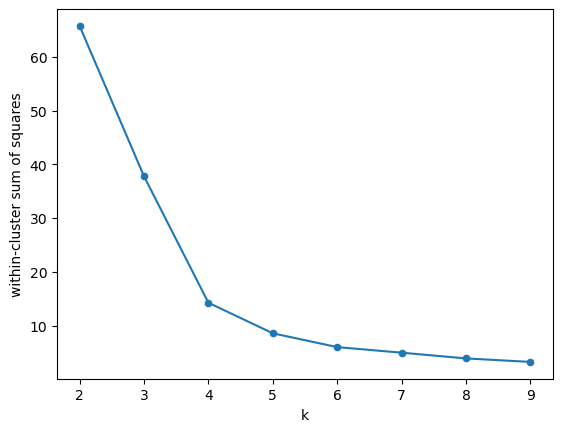

In [60]:
latlon=np.array([latitudes, longitudes])
latlon=latlon.T
print(latlon.shape)
X_scaled = StandardScaler().fit(latlon).transform(latlon)

# m = KMeans(n_clusters = 2, random_state = 12345).fit(X_scaled) 



K = range(2, 10)
withinSS = []

# create models and calculate scores
for k in K:
    m = KMeans(n_clusters = k, random_state = 12345).fit(X_scaled) 

    
    # access to the total sum of squares directly from the model
    withinSS.append(m.inertia_)

# plot the scores
sns.lineplot(x = K, y = withinSS)
sns.scatterplot(x = K, y = withinSS)

plt.xlabel('k')
plt.ylabel('within-cluster sum of squares')





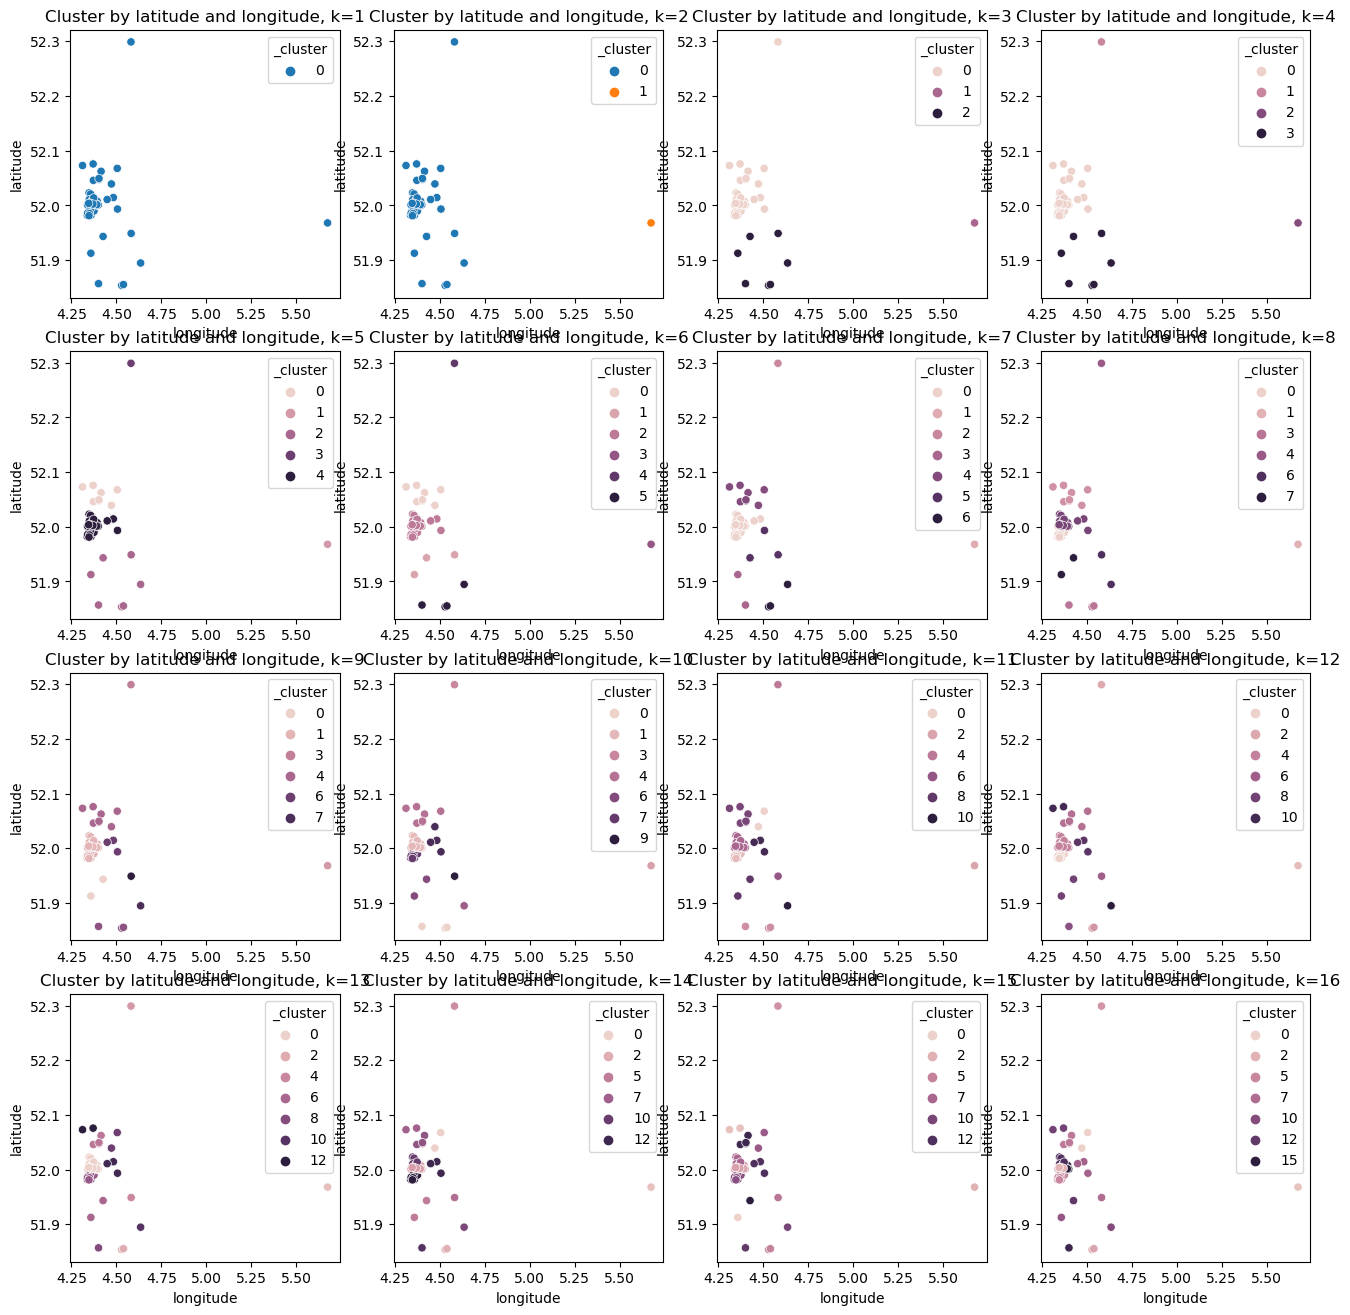

In [65]:
import warnings
warnings.filterwarnings('ignore')
kmax=9
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(16,16))
axes = axes.ravel()





for k, axs in enumerate(axes):   
    m = KMeans(n_clusters = k+1, random_state = 12345).fit(X_scaled) 
    

    data['_cluster'] = m.labels_
    data['longitude']=pd.DataFrame(longitudes)
    data['latitude']=pd.DataFrame(latitudes)
    # plot the data using colors to identify clusters
    axs.set_title(f'Cluster by latitude and longitude, k={k+1}')
    sns.scatterplot( x = 'longitude', y = 'latitude', hue = '_cluster', data = data, ax=axs)
#     plt.title(f'Cluster by latitude and longitude, k={k}')
plt.savefig("C:\\Users\\pvanderzalm\\Documents\\LBAStest\\cluster_analysis.png") 

In [ ]:
print(set(data._cluster))

In [66]:
k=6

import geopy
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent="myGeocoder")

# gmap3 = gmplot.GoogleMapPlotter(52.010153393815024, 4.712155449169927, 9) 
# gmap3.scatter([LBAS[0]], [LBAS[1]], size = 10, marker = True, color='yellow',label='LBAS' ) 
# palette = sns.color_palette("tab10", k)
# print(palette)
center_dic={}

colormap2 = ['cyan','red','blue','green','yellow','purple','pink','forestgreen','gold','chocolate']
colormap=['green', 'gray', 'orange', 'purple', 'cadetblue', 'darkred', 'darkblue', 'lightgray', 'darkgreen', 'beige', 'lightred', 'black', 'lightgreen']

m2 = folium.Map(location=(52.010153393815024, 4.712155449169927), zoom_start=9)
folium.Marker(location=[LBAS[0], LBAS[1]],
            tooltip="Click me!",
            popup="Lets Bake a Story",
            icon=folium.Icon(icon="fa-solid fa-house", prefix='fa',color="darkblue",icon_color="#FDD03F")
).add_to(m2)

grouplist=[]
for i in range(k):
    l=chr(65+i)
#     p=palette[i]
#     color='#%02x%02x%02x' % (int(255*p[0]),int(255*p[1]),int(255*p[2]))
    
    color=colormap[i]
    series=data[data._cluster==i]
    lat_c=np.mean(series['latitude'])
    lon_c=np.mean(series['longitude'])
    center_dic[l]=(lat_c,lon_c)
#     groupname=locator.reverse(center_dic[l]).raw["address"]["suburb"]
#     print(locator.reverse(center_dic[l].raw))
    groupadress=locator.reverse(center_dic[l]).raw["address"]
    if "city" in groupadress:
#         groupname=f"{groupadress["city"]}  {groupadress["suburb"]}"
        groupname=groupadress["city"]
    elif "town" in groupadress:
        groupname=groupadress["town"]

    group_temp = folium.FeatureGroup(groupname).add_to(m2)
    

    for j, name in enumerate(list(series.Surname)):
        folium.Marker(
            location=[list(series.latitude)[j], list(series.longitude)[j]],
            tooltip="Click me!",
            popup=name,
            icon=folium.Icon(icon="fa-solid fa-person", prefix='fa',color=colormap[i],icon_color="#FDD03F")
        ).add_to(group_temp)
        
#     if len(list(series.latitude))>1:
#         folium.Marker(
#             location=[lat_c, lon_c],
#             tooltip="Click me!",
#             popup=name,
#             icon=folium.Icon(icon="fa-solid fa-bullseye", prefix='fa',color=colormap[i],icon_color="white")
#         ).add_to(group_temp)
    grouplist.append(group_temp)
#     gmap3.scatter( series['latitude'], series['longitude'], size = 5, marker = True, color=color,label=list(series['Surname']) ) 
#     if len(series)>1:
folium.LayerControl().add_to(m2)    
    
m2
m2.save("C:\\Users\\pvanderzalm\\Documents\\LBAStest\\clustertest.html")

In [ ]:
for i in range(k):
    series=data[data._cluster==i]
    print(series['fulladress'])
    
    

In [ ]:
# coord=center_dic["A"]
# print(locator.reverse(coord).raw["address"]["suburb"])
print(series)

In [ ]:
def hav(x):
    return (1-math.cos(x/2))/2

def distance(point1,point2):

#     C=111.139
    C=1
    x1,y1=point1 
    x2,y2=point2
    x1=x1*C
    y1=y1*C
    x2=x2*C
    y2=y2*C
    
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

    
def find_min_dist(start, dic):
    
    def distance(point1,point2):
        #     C=111.139
        C=1
        x1,y1=point1 
        x2,y2=point2
        x1=x1*C
        y1=y1*C
        x2=x2*C
        y2=y2*C

        return math.sqrt((x1-x2)**2+(y1-y2)**2)

    mindist=float("inf")
    nextcenter=''
    for center in dic:
        cpoint=dic[center]
#         print(start)
#         print(cpoint)
        d=distance(start,cpoint)
        if 0<d<mindist:
            mindist=d
            nextcenter=center
    return nextcenter, mindist


In [ ]:
distance()

In [ ]:
# print(center_dic)

cluster_dic={}
cluster_dic_dic={}
cluster_dic_dic["LBAS"]={}
for cluster in center_dic:
    cluster_dic_dic[cluster]={}
# print(cluster_dic_dic)
cluster_visited=['LBAS']
start=LBAS
center_tempdic = center_dic.copy()
total_dist=0
oldcluster='LBAS'
# while len(cluster_visited)<k:
for i in range(k):
    cluster,distance=find_min_dist(start, center_tempdic)
    item=center_tempdic[cluster]
    total_dist+=distance
    
#         print(start)
    if cluster not in cluster_visited:
        cluster_visited.append(cluster)
        center_tempdic.pop(cluster, None)
#         print(cluster)
        secondcluster,seconddist=find_min_dist(start, center_tempdic)
    


#         print(cluster_dic_dic)
        
        
        cluster_dic_dic[oldcluster][cluster]=distance
        if i>0:
            cluster_dic_dic[cluster][oldcluster]=distance
        if i<k-1:   
            cluster_dic[oldcluster]=[(cluster,distance),(secondcluster,seconddist)]
            cluster_dic_dic[oldcluster][secondcluster]=seconddist
            if i>0:
                cluster_dic_dic[secondcluster][oldcluster]=seconddist
        else:
            cluster_dic[oldcluster]=[(cluster,distance)]

        oldcluster=cluster
        start=center_dic[cluster]
#         center_tempdic[cluster]=item
#         print(cluster_visited)
        
        
cluster_visited.append('LBASend')
center_tempdic['LBASend']=LBAS
cluster,distance=find_min_dist(start, center_tempdic)
total_dist+=distance
cluster_dic[oldcluster]=[('LBASend',distance)]
# print(cluster_visited, total_dist)
# print(cluster_dic)
print(cluster_dic_dic)

In [ ]:
data.head()

In [ ]:
start=LBAS
end=center_dic[cluster_visited[2]]
data[data._cluster==1]
beginpoints=[]
endpoints=[]
adress_visited=['LBAS']
d={}
for c,cluster in enumerate(cluster_visited[1:-1]):

    
#     print(cluster)
    i=ord(cluster)-65
    series=data[data._cluster==i]
    n=len(series)
    latlon=series[['fulladress','latitude','longitude']]
    latlondic=latlon.to_dict('list')
#     print(latlondic)

    a_dic={}
    for i in range(n):
        lat=latlondic['latitude'][i]
        lon=latlondic['longitude'][i]
        a_dic[latlondic['fulladress'][i]]=(lat,lon)
        d[latlondic['fulladress'][i]]=(lat,lon)
#     print(a_dic)
    begin=find_min_dist(start, a_dic)[0]
    
    
    center_tempdic = a_dic.copy()

    # while len(cluster_visited)<k:
    for i in range(n):
        adress,distance=find_min_dist(start, center_tempdic)
        if adress not in adress_visited:
            adress_visited.append(adress)
            center_tempdic.pop(adress, None)
#             start=a_dic[adress]

    

    
    
    
    
    
    
    beginpoints.append(begin)
    ending=find_min_dist(end, a_dic)[0]
    endpoints.append(ending)
    if c<len(cluster_visited)-4:
        print(cluster_visited[c+2])
        start=a_dic[begin]
#         start=find_min_dist(end, a_dic)[0]
#         start=center_dic[cluster_visited[c+1]]
        end=center_dic[cluster_visited[c+3]]

    
    
# adress_visited.append('LBASend')    
# print(beginpoints)
# print(endpoints)
# print(adress_visited)
# print(len(adress_visited))
d['LBAS']=LBAS
# d['LBASend']=LBAS
latlist=[]
lonlist=[]
namelist=[]
for i,name in enumerate(adress_visited[:-1]):
    latlist.append(d[name][0])
    latlist.append(d[adress_visited[i+1]][0])
    lonlist.append(d[name][1])
    lonlist.append(d[adress_visited[i+1]][1])
    #     print(l)
    # data[data.fieldname == "rowvalue"]
    surname=data[data.fulladress==name][['Surname']]
    namelist.append(surname)
    
    
gmap3.plot(latlist, lonlist,  
           'cornflowerblue', edge_width = 2.5) 
gmap3.draw("C:\\Users\\chris\\Documents\\LBAStest\\mapjackie3.html" ) 

namelist[1]

In [ ]:

# print(cluster_dic_dic)
adress_visited=['LBAS']

center_tempdic = a_dic.copy()

# while len(cluster_visited)<k:
for i in range(n):
    adress,distance=find_min_dist(start, center_tempdic)
    if adress not in adress_visited:
        adress_visited.append(adress)
        center_tempdic.pop(adress, None)
        start=center_dic[adress]
    
cluster_visited.append('LBASend')

center_tempdic['LBASend']=LBAS
cluster,distance=find_min_dist(start, center_tempdic)
total_dist+=distance
cluster_dic[oldcluster]=[('LBASend',distance)]
# print(cluster_visited, total_dist)
# print(cluster_dic)
print(cluster_dic_dic)

In [ ]:
# tempdicdic=cluster_dic_dic.copy()
# cd={}
# for cluster in center_dic:
#     cd[cluster]={}


# for c in center_dic:
#     key_min = min(tempdicdic[c].keys(), key=(lambda k: tempdicdic[c][k]))
#     cd[c][key_min]=tempdicdic[c][key_min]
#     tempdicdic[c].pop(key_min, None)
#     key_min = min(tempdicdic[c].keys(), key=(lambda k: tempdicdic[c][k]))
#     cd[c][key_min]=tempdicdic[c][key_min]
# print(cd)

In [ ]:
print(cluster_visited)
print(total_dist)
print('####################')
tempdicdic=cluster_dic_dic.copy()        
for i in range(k-1):
    new_order=cluster_visited[:i+1]
#     print(new_order)
    current=cluster_visited[i]
#     t_dist1=0
    t_dist2=0
#     order_list1=cluster_visited[:i+1]
    order_list2=cluster_visited[:i+1]
    

    
    dist2=sorted(tempdicdic[current].values())[1]

    key_list = list(tempdicdic[current].keys())
    val_list = list(tempdicdic[current].values())
 

    position = val_list.index(dist2)
    second_choice=key_list[position]

    
    

    order_list2.append(second_choice)
    t_dist2+=dist2
    cluster,dist=cluster_dic[second_choice][0]
    t_dist2+=dist
    order_list2.append(cluster)
    while cluster is not 'LBASend':
        dist=sorted(tempdicdic[cluster].values())[0]
        key_list = list(tempdicdic[cluster].keys())
        val_list = list(tempdicdic[cluster].values())


        position = val_list.index(dist)
        newchoice=key_list[position]
        
        t_dist2+=dist
        cluster=newcluster
        order_list2.append(cluster)
    
    order_list2.insert(-1,first_choice)
#     print(order_list1)
    print(order_list2)
    print('*******')
#     print(t_dist2)
    if t_dist2<total_dist and len(order_list2)==len(cluster_visited):
        cluster_visited=order_list2
        total_dist=t_dist2
        print(order_list2)

In [ ]:
print(cluster_visited)
tempdicdic=cluster_dic_dic.copy()        
for i in range(k-1):
    new_order=cluster_visited[:i+1]
    print(new_order)
    current=cluster_visited[i]
#     t_dist1=0
    t_dist2=0
#     order_list1=cluster_visited[:i+1]
    order_list2=cluster_visited[:i+1]
    
#     first_choice,dist1=cluster_dic[current][0]
#     order_list1.append(first_choice)
#     t_dist1+=dist1
#     cluster,dist=cluster_dic[first_choice][0]
#     t_dist1+=dist
#     order_list1.append(cluster)
#     while cluster is not 'LBASend':
#         newcluster,dist=cluster_dic[cluster][0]
#         t_dist1+=dist
#         cluster=newcluster
#         order_list1.append(cluster)
    
#     second_min=sorted(tempdicdic[current].values())[-2]
    
#     key_list = list(my_dict.keys())
#     val_list = list(my_dict.values())
 
#     # print key with val 100
#     position = val_list.index(100)
#     print(key_list[position])
    
    
#     tempdicdic[current]
#     key_min = min(tempdicdic[current].keys(), key=(lambda k: tempdicdic[current][k]))
#     cd[c][key_min]=tempdicdic[c][key_min]
#     tempdicdic[c].pop(key_min, None)
#     key_min = min(tempdicdic[c].keys(), key=(lambda k: tempdicdic[c][k]))
#     cd[c][key_min]=tempdicdic[c][key_min]
    
    
    second_choice,dist2=cluster_dic[current][1]
    order_list2.append(second_choice)
    t_dist2+=dist2
    cluster,dist=cluster_dic[second_choice][0]
    t_dist2+=dist
    order_list2.append(cluster)
    while cluster is not 'LBASend':
        newcluster,dist=cluster_dic[cluster][0]
        t_dist2+=dist
        cluster=newcluster
        order_list2.append(cluster)
    
    order_list2.insert(-1,first_choice)
#     print(order_list1)
#     print(order_list2)
    print('*******')
    if t_dist2<total_dist and len(order_list2)==len(cluster_visited):
        cluster_visited=order_list2
        total_dist=t_dist2
        print(order_list2)


In [ ]:
mindist=float("inf")
nextcenter=''
for center in center_dic:
    cpoint=center_dic[center]
    d=distance(LBAS,cpoint)
    if d<mindist:
        mindist=d
        nextcenter=center
print(nextcenter,d)
# Plot method Draw a line in 
# between given coordinates 
A=center_dic[nextcenter]


gmap3.plot([LBAS[0],A[0]], [LBAS[1],A[1]],  
           'cornflowerblue', edge_width = 2.5) 
gmap3.draw("C:\\Users\\chris\\Documents\\LBAStest\\map11.html" ) 

In [ ]:
# gmap3 = gmplot.GoogleMapPlotter(52.010153393815024, 4.712155449169927, 9) 

# series=data[data._cluster==i]
# #     print(series['_cluster'])
# gmap3.scatter( series['latitude'], series['longitude'], size = 5, marker = True, color='cyan',label=list(series['Surname']) ) 

# gmap3.draw("C:\\Users\\chris\\Documents\\LBAStest\\map11.html" ) 

In [ ]:
# #plot somewhere
# latitude_list = [ 30.3358376, 30.307977, 30.3216419 ] 
# longitude_list = [ 77.8701919, 78.048457, 78.0413095 ] 
  
# gmap3 = gmplot.GoogleMapPlotter(30.3164945, 
#                                 78.03219179999999, 13) 
  
# # scatter method of map object  
# # scatter points on the google map 
# gmap3.scatter( latitude_list, longitude_list, 
#                               size = 40, marker = False ) 
  
# # Plot method Draw a line in 
# # between given coordinates 
# gmap3.plot(latitude_list, longitude_list,  
#            'cornflowerblue', edge_width = 2.5) 
# gmap3.draw("C:\\Users\\chris\\Documents\\LBAStest\\map11.html" ) 

In [ ]:
#plot home with geopy

locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Pijlkruid 10,Nootdorp, Netherlands")
# print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

lat=location.latitude
lon=location.longitude

gmap3 = gmplot.GoogleMapPlotter(lat, 
                                lon, 13) 
gmap3.scatter( [lat], [lon], size = 5, marker = True, color='cyan' ) 

gmap3.draw("C:\\Users\\chris\\Documents\\LBAStest\\map11.html" ) 

In [ ]:
#folium
# Create a map object and center it to the avarage coordinates to m
m = folium.Map(location=df[["lat", "lon"]].mean().to_list(), zoom_start=2)
# if the points are too close to each other, cluster them, create a cluster overlay with MarkerCluster, add to m
marker_cluster = MarkerCluster().add_to(m)
# draw the markers and assign popup and hover texts
# add the markers the the cluster layers so that they are automatically clustered
for i,r in df.iterrows():
    location = (r["lat"], r["lon"])
    folium.Marker(location=location,
                      popup = r['Name'],
                      tooltip=r['Name'])\
    .add_to(marker_cluster)
# display the map
m
  


In [ ]:


# selection of columns 
X = data[['murder', 'rape', 'assault']]
# standardize them so they all have zero mean and unit variance
X_scaled = StandardScaler().fit(X).transform(X)

# m = KMeans(n_clusters = 2, random_state = 12345).fit(X_scaled) 



K = range(2, 10)
withinSS = []

# create models and calculate scores
for k in K:
    m = KMeans(n_clusters = k, random_state = 12345).fit(X_scaled) 

    
    # access to the total sum of squares directly from the model
    withinSS.append(m.inertia_)

# plot the scores
sns.scatterplot(x = K, y = withinSS)
plt.xlabel('k')
plt.ylabel('within-cluster sum of squares')
print("A k of 6 seems to give the perfect balance between amount of clusters and reduction of the within-cluster sum of squares")